<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/Precipitation%2C_Water_Inflow_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precipitation vs NDVI** （Calendar Precipitation）

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving precipitation_calendar_part1.csv to precipitation_calendar_part1 (1).csv


In [24]:
df_precipitation=pd.read_csv('precipitation_calendar_part1.csv',index_col=0)
df_precipitation.head(10)

,Year,Precipitation
0,1982,9.519552
1,1983,10.430727
2,1984,7.410478
3,1985,8.727582
4,1986,9.198033
5,1987,12.395087
6,1988,11.345632
7,1989,9.872419
8,1990,9.969525
9,1991,10.125272


# Statistic Summary

In [25]:
summary=df_precipitation.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,23.0,1993.00,6.78,1982.00,1987.50,1993.00,1998.50,2004.00
Precipitation,23.0,9.96,2.22,6.25,8.74,9.88,10.89,16.02


# Visualisation

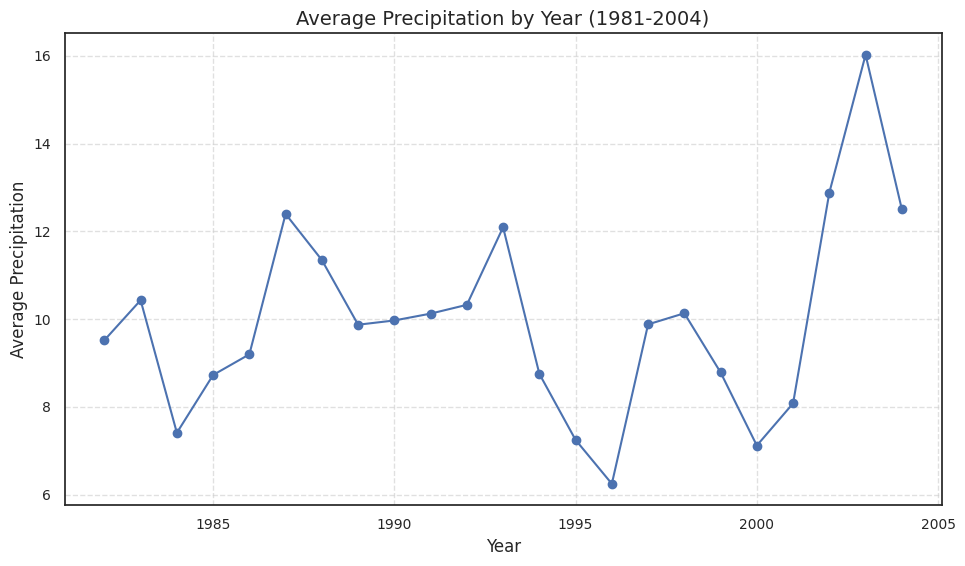

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_precipitation['Year'], df_precipitation['Precipitation'], marker='o', linestyle='-', color='b')
plt.title('Average Precipitation by Year (1981-2004)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Precipitation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Regression

In [7]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_calendar_part1.csv to ndvi_calendar_part1.csv


In [27]:
ndvi_df = pd.read_csv('ndvi_calendar_part1.csv',index_col=0)
ndvi_df.rename(columns={'Year': 'Year'}, inplace=True)
merged_df = pd.merge(df_precipitation, ndvi_df, on="Year")
merged_df

,Year,Precipitation,NDVI
0,1982,9.519552,0.090632
1,1983,10.430727,0.093746
2,1984,7.410478,0.087002
3,1985,8.727582,0.089661
4,1986,9.198033,0.082829
5,1987,12.395087,0.090683
6,1988,11.345632,0.072781
7,1989,9.872419,0.068782
8,1990,9.969525,0.085278
9,1991,10.125272,0.087681


In [11]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [29]:
df_precipitation = merged_df['Precipitation']
NDVI=merged_df['NDVI']
Precipitation=merged_df['Precipitation']
model = ols('NDVI ~ Precipitation	', data=df_precipitation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.521
Date:                Sun, 19 Jan 2025   Prob (F-statistic):              0.127
Time:                        16:40:09   Log-Likelihood:                 62.284
No. Observations:                  23   AIC:                            -120.6
Df Residuals:                      21   BIC:                            -118.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0717      0.016      4.350


The model examines the relationship between precipitation and NDVI. The coefficient for precipitation is 0.0026, indicating a weak positive relationship, but it is not statistically significant (p = 0.127, greater than 0.05). The R-squared value is 0.107, suggesting that the model explains only 10.7 percent of the variation in NDVI, indicating a relatively poor fit. The intercept is statistically significant (p = 0.000), but the overall model lacks strong explanatory power. Adding more variables or refining the dataset may improve the model's performance and provide better insights.

# **Precipitation vs NDVI** （Seasonal Precipitation）

In [30]:
from google.colab import files
uploaded = files.upload()

Saving precipitation_seasonal_part1.csv to precipitation_seasonal_part1.csv


In [31]:
df_precipitation=pd.read_csv('precipitation_seasonal_part1.csv',index_col=0)
df_precipitation.head(10)

,SeasonYear,Precipitation
0,1982,8.338516
1,1983,9.684831
2,1984,8.780755
3,1985,9.008443
4,1986,6.194641
5,1987,15.326327
6,1988,10.048815
7,1989,10.920224
8,1990,8.507096
9,1991,10.734214


In [32]:
summary=df_precipitation.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
SeasonYear,23.0,1993.00,6.78,1982.00,1987.50,1993.00,1998.50,2004.00
Precipitation,23.0,9.87,2.55,6.19,8.04,10.05,10.87,15.33


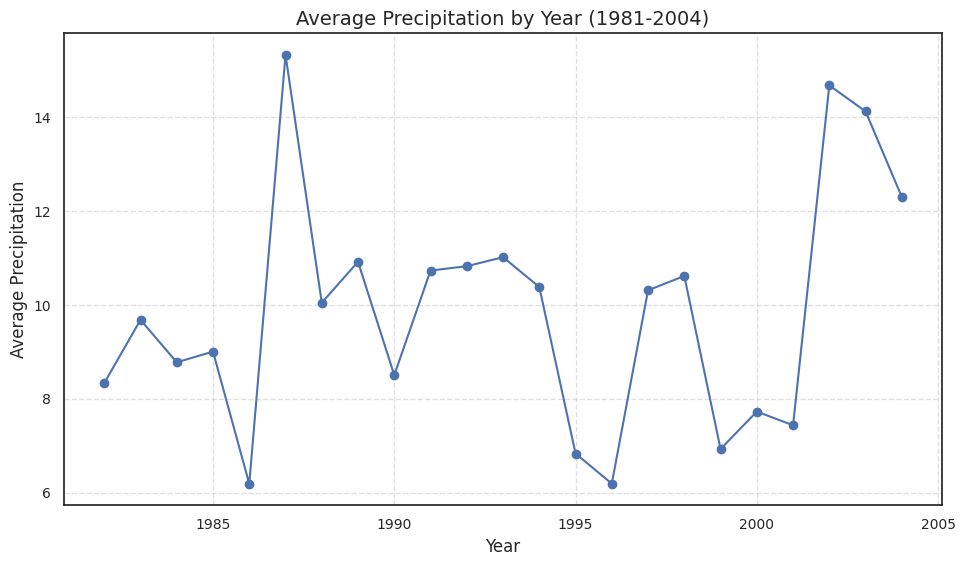

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_precipitation['SeasonYear'], df_precipitation['Precipitation'], marker='o', linestyle='-', color='b')
plt.title('Average Precipitation by Year (1981-2004)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Precipitation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [36]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_seasonal_part1.csv to ndvi_seasonal_part1.csv


In [38]:
ndvi_df = pd.read_csv('ndvi_seasonal_part1.csv',index_col=0)
merged_df = pd.merge(df_precipitation, ndvi_df, on="SeasonYear")
merged_df

,SeasonYear,Precipitation,NDVI
0,1982,8.338516,0.095647
1,1983,9.684831,0.093862
2,1984,8.780755,0.094137
3,1985,9.008443,0.081850
4,1986,6.194641,0.087124
5,1987,15.326327,0.087074
6,1988,10.048815,0.089894
7,1989,10.920224,0.053126
8,1990,8.507096,0.086357
9,1991,10.734214,0.085865


In [39]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
df_precipitation = merged_df['Precipitation']
NDVI=merged_df['NDVI']
Precipitation=merged_df['Precipitation']
model = ols('NDVI ~ Precipitation	', data=df_precipitation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.224
Date:                Sun, 19 Jan 2025   Prob (F-statistic):              0.281
Time:                        16:48:32   Log-Likelihood:                 60.377
No. Observations:                  23   AIC:                            -116.8
Df Residuals:                      21   BIC:                            -114.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0805      0.016      5.162

The model examines the relationship between precipitation and NDVI. The coefficient for precipitation is 0.0017, indicating a weak positive relationship, but it is not statistically significant (p = 0.281, greater than 0.05). The R-squared value is 0.055, suggesting that the model explains only 5.5 percent of the variation in NDVI, indicating a poor fit. The intercept is statistically significant (p = 0.000), but the overall model lacks strong explanatory power. Adding more variables or refining the dataset may help improve the model's accuracy and reliability.









# **Water inflow from two rivers vs NDVI**

# 1. Summary Statistics

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

Saving Water_Delivery.csv to Water_Delivery.csv


In [ ]:
df_waterinflow=pd.read_csv('Water_Delivery.csv')
df_waterinflow = df_waterinflow.iloc[0:].reset_index(drop=True)
df_waterinflow.head(10)

,Years,Amudarya_Growing,Amudarya_NonGrowing,Syrdarya_Growing,Syrdarya_NonGrowing
0,1992,23181,5931,1341.5,2581.7
1,1993,13595,5155,3387.1,3691.2
2,1994,13990,6977,3395.3,4306.8
3,1995,1412,5709,517.3,4900.1
4,1996,4871,1934,927.7,956.1
5,1997,922,2899,648.0,3635.2
6,1998,20177,1579,3534.8,2337.0
7,1999,2574,4066,2418.7,4705.9
8,2000,614,4191,970.5,1657.3
9,2001,126,470,947.5,2753.4


In [ ]:
summary=df_waterinflow.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Years,13.0,1998.00,3.89,1992.0,1995.0,1998.0,2001.0,2004.0
Amudarya_Growing,13.0,7628.46,7758.20,126.0,1412.0,4301.0,13595.0,23181.0
Amudarya_NonGrowing,13.0,3442.00,2129.34,274.0,1934.0,3455.0,5155.0,6977.0
Syrdarya_Growing,13.0,2318.48,1453.91,517.3,947.5,2418.7,3534.8,4393.7
Syrdarya_NonGrowing,13.0,3302.70,1544.36,956.1,2337.0,3635.2,4306.8,6079.9


# 2. Visualisation

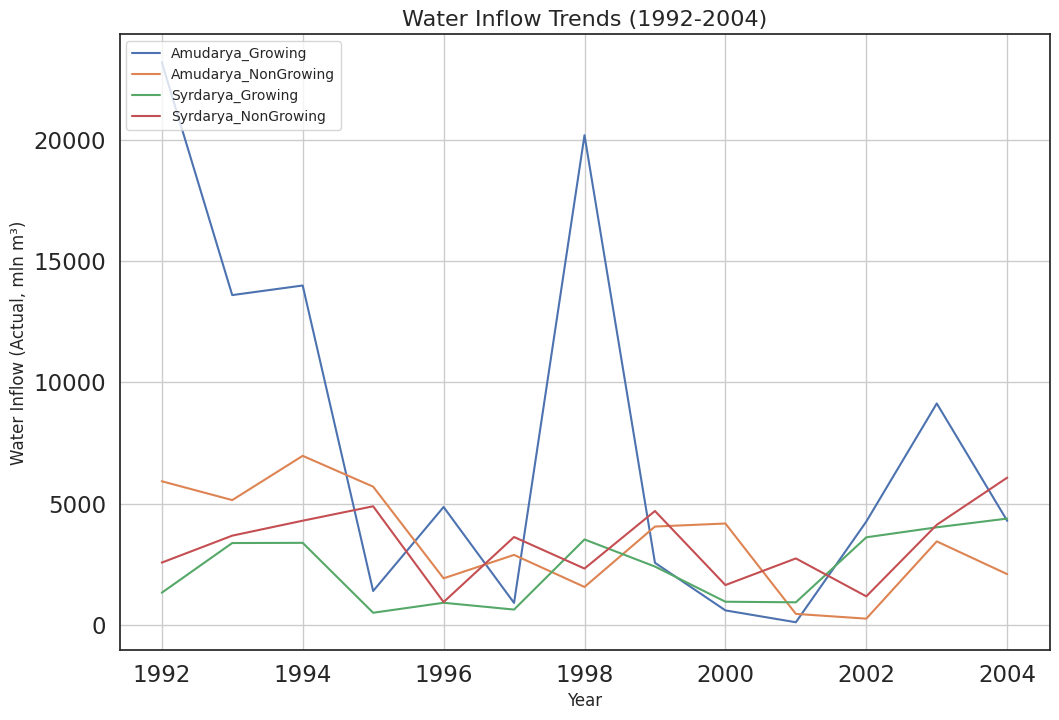

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for column in df_waterinflow.columns[1:]:
    plt.plot(df_waterinflow["Years"], df_waterinflow[column], label=column)

plt.title("Water Inflow Trends (1992-2004)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Water Inflow (Actual, mln m³)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Year_NDVI.csv to Year_NDVI.csv


In [ ]:
import pandas as pd

# Load the water delivery data and NDVI data
water_delivery_df = df_waterinflow  # Replace with your file path
ndvi_df = pd.read_csv('Year_NDVI.csv')
ndvi_df

,year,ndvi
0,1981,0.456717
1,1982,0.302966
2,1983,0.313053
3,1984,0.301992
4,1985,0.317433
5,1986,0.285627
6,1987,0.310313
7,1988,0.311865
8,1989,0.253266
9,1990,0.300415


In [ ]:
ndvi_df = pd.read_csv('Year_NDVI.csv')
ndvi_df.rename(columns={'year': 'Years'}, inplace=True)
merged_df = pd.merge(df_waterinflow, ndvi_df, on="Years")
merged_df

,Years,Amudarya_Growing,Amudarya_NonGrowing,Syrdarya_Growing,Syrdarya_NonGrowing,ndvi
0,1992,23181,5931,1341.5,2581.7,0.305150
1,1993,13595,5155,3387.1,3691.2,0.320836
2,1994,13990,6977,3395.3,4306.8,0.344549
3,1995,1412,5709,517.3,4900.1,0.364707
4,1996,4871,1934,927.7,956.1,0.337529
5,1997,922,2899,648.0,3635.2,0.385210
6,1998,20177,1579,3534.8,2337.0,0.360696
7,1999,2574,4066,2418.7,4705.9,0.366219
8,2000,614,4191,970.5,1657.3,0.076657
9,2001,126,470,947.5,2753.4,0.063584


# 3. Assumption

## A.Independence

The dataset is arranged in chronological order, which introduces the possibility of time dependence. This could affect the assumption of residual independence, as residuals may exhibit autocorrelation, particularly between adjacent years.
To address this issue and account for potential time-related effects,*** a panel regression analysis*** will be conducted in subsequent steps.

# B. Homoscedasticity

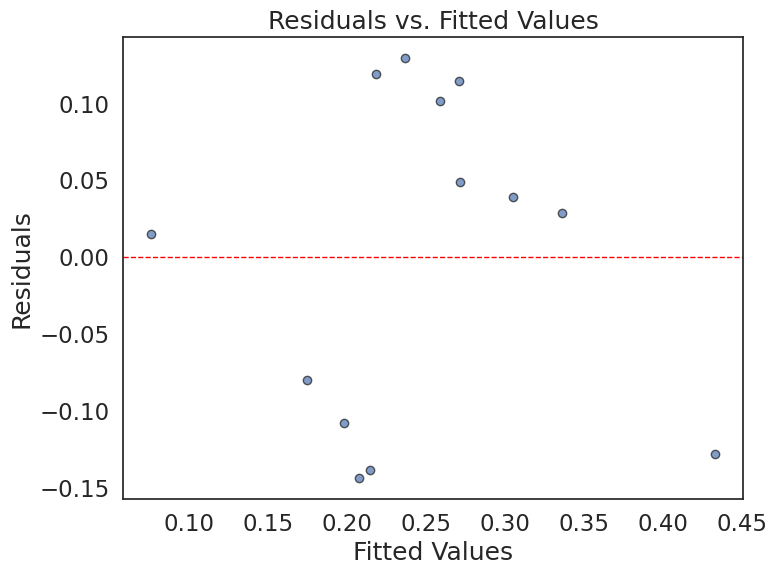

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['Amudarya_Growing', 'Amudarya_NonGrowing', 'Syrdarya_Growing', 'Syrdarya_NonGrowing']]
y = merged_df['ndvi']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residuals vs. fitted values plot shows **some signs of heteroscedasticity**, as the spread of residuals increases with higher fitted values, forming a slight funnel shape. This suggests a potential violation of the homoscedasticity assumption. To address this, transformations (e.g., log transformation) could be considered, or the current model can be used with the limitation noted in the analysis.

# C. Multicollinearity

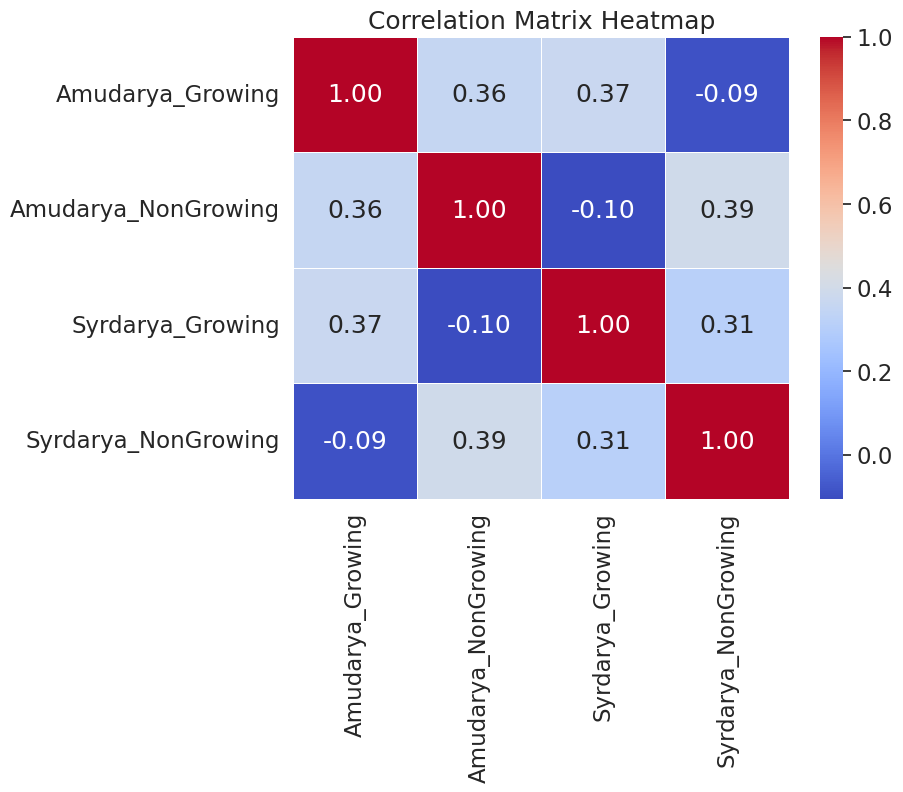

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Amudarya_Growing', 'Amudarya_NonGrowing', 'Syrdarya_Growing', 'Syrdarya_NonGrowing']

correlation_matrix = merged_df[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap shows the correlation between the variables. The correlations are relatively low, with the highest being 0.37 between Amudarya_Growing and Syrdarya_Growing, indicating no strong linear relationship between the variables. All correlations are below 0.8, suggesting that multicollinearity is not a significant issue in this dataset. Therefore, these variables can be safely used in the regression analysis without further adjustments for multicollinearity.

# 4. Regression

Given the dataset, there is no significant multicollinearity issue as indicated by the correlation heatmap, with all correlation coefficients below 0.8. However, potential challenges related to dependence and heteroscedasticity remain. The chronological order of the data suggests possible dependence, where residuals may exhibit autocorrelation. Additionally, the residuals vs. fitted values plot hints at potential heteroscedasticity, where the variance of residuals is not constant.

Despite these concerns, **We will proceed with an initial OLS analysis to explore the relationships between variables.** Following the regression, diagnostic tests such as the Durbin-Watson test for dependence and visual inspections of residual patterns will be conducted. If significant violations of assumptions are detected, appropriate adjustments will be made, such as using panel regression or robust standard errors to improve model reliability.

NDVI = β0 + β1 * Amudarya_NonGrowing_Season + β2 * Amudarya_NonGrowing_Season + β3 * Syrdarya_Growing_Season + β4 * Amudarya_Growing_Actual + ε

*   NDVI: The dependent variable
*   Amudarya_NonGrowing_Season: The first predictor variable
*   mudarya_Growing_Season: The second predictor variable
*   Amudarya_Growing_Actua:  The third predictor variable
*   mudarya_Growing_Actual: The forth predictor variable


In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_NonGrowing_Season = df_waterinflow['Amudarya_NonGrowing']
Amudarya_Growing_Season = df_waterinflow['Amudarya_Growing']
Syrdarya_NonGrowing_Season = df_waterinflow['Syrdarya_NonGrowing']
Syrdarya_Growing_Season = df_waterinflow['Syrdarya_Growing']
NDVI=merged_df['ndvi']

model = ols('ndvi ~ Amudarya_NonGrowing_Season + Amudarya_Growing_Season + Syrdarya_NonGrowing_Season + Syrdarya_Growing_Season ', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.312
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.344
Time:                        13:23:43   Log-Likelihood:                 11.312
No. Observations:                  13   AIC:                            -12.62
Df Residuals:                       8   BIC:                            -9.799
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


# **Results**
None of the predictors have p-values below 0.05, so there is no statistically significant evidence to suggest that any of the water flow variables (growing or non-growing season flows for both Amudarya and Syrdarya rivers) have a strong impact on the NDVI within this dataset.

# **Reasons**

The Water Flow Trend graph shows high variability and inconsistent patterns in water inflow, especially with spikes like the Amudarya in 1998. These fluctuations and outliers make it hard to establish a clear link with NDVI, leading to non-significant regression results. More consistent data or outlier adjustments are needed.





